In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import xgboost
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [54]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


# Basic EDA

In [56]:
df.shape

(5000, 7)

In [57]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [59]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [60]:
df[:3]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."


In [61]:
df.nunique() #no of bedrooms has duplicate values

Avg. Area Income                5000
Avg. Area House Age             5000
Avg. Area Number of Rooms       5000
Avg. Area Number of Bedrooms     255
Area Population                 5000
Price                           5000
Address                         5000
dtype: int64

In [62]:
# Address is in textual form


In [63]:
df['Avg. Area Number of Bedrooms'].value_counts() #checks what values are being repeated how many times

Avg. Area Number of Bedrooms
4.38    46
3.17    41
3.40    40
3.16    39
3.22    38
        ..
6.31     7
6.01     6
6.02     6
5.42     6
6.42     5
Name: count, Length: 255, dtype: int64

### Missing data

In [65]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

agar missing values hoti to:
- check kro distribution kesa hai (normal ya skewed)
- if skewness> -1 or +1 => highly skewed
- if normal => average se fill krdo
- we can check via distplot as well

In [67]:
skew = df['Avg. Area Income'].skew()
skew

-0.03371997540427547

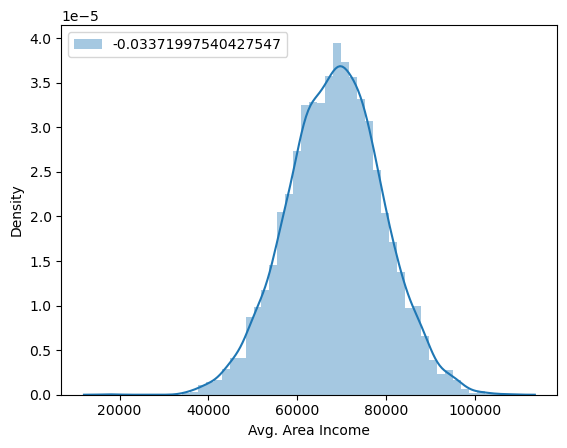

In [68]:
sn.distplot(df['Avg. Area Income'], label = skew)  
plt.legend()
plt.show()

In [69]:
df['Avg. Area Income'].mean()

68583.10898395974

<Axes: xlabel='Avg. Area House Age', ylabel='Density'>

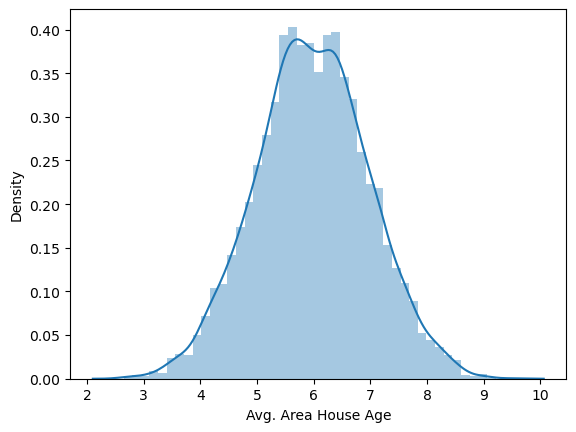

In [70]:
sn.distplot(df['Avg. Area House Age'])

### Duplicate data

In [72]:
df.duplicated().sum()

0

In [73]:
df[df.duplicated()]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


# 20 June

### Outliers and anomalies

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Avg. Area Income'),
  Text(1, 0, 'Avg. Area House Age'),
  Text(2, 0, 'Avg. Area Number of Rooms'),
  Text(3, 0, 'Avg. Area Number of Bedrooms'),
  Text(4, 0, 'Area Population'),
  Text(5, 0, 'Price')])

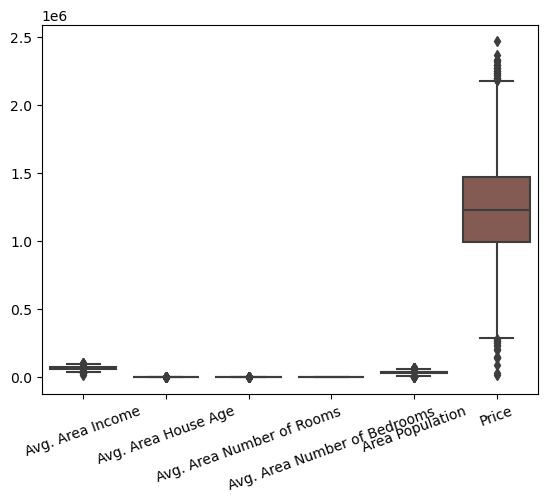

In [76]:
sn.boxplot(df)
plt.xticks(rotation=20)

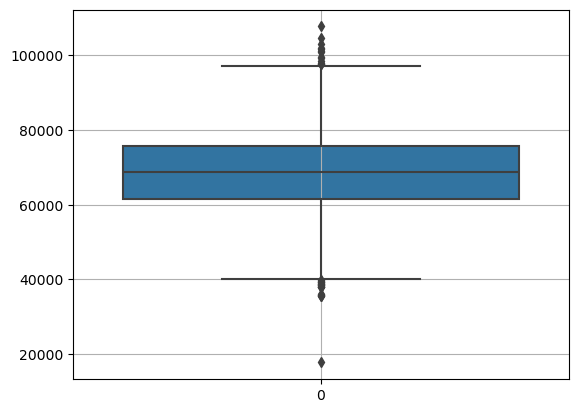

In [77]:
sn.boxplot(df['Avg. Area Income'])
plt.grid()

In [78]:
len(df[df['Avg. Area Income'] > 97000])

15

In [79]:
df[df['Avg. Area Income'] > 97000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
428,97112.361252,5.914725,6.133646,3.10,51470.067638,1.917584e+06,"35841 Christine Shore\nWallmouth, NC 98956-5357"
558,99629.013581,5.431863,7.351398,5.45,36950.739057,1.883481e+06,"PSC 0420, Box 6835\nAPO AE 08359"
693,107701.748378,7.143522,8.518608,3.29,37619.439929,2.332111e+06,"41017 Eric Village\nJonathanport, CO 37205"
962,101928.858060,4.829586,9.039382,4.08,22804.991935,1.938866e+06,"856 Harris Centers Suite 940\nNicholasport, IL..."
1096,97548.310413,5.460973,6.609396,2.50,39089.415712,2.026303e+06,"349 Sean Forges\nWhitakerville, WY 85138-4153"
1734,104702.724257,5.575523,6.932106,3.22,22560.527135,1.742432e+06,"14230 Douglas River Suite 570\nConniechester, ..."
1891,101144.323930,6.350845,7.231771,3.09,35772.524007,2.007556e+06,"233 Wilson Ranch Suite 086\nWest Christine, IN..."
2300,98468.253641,7.035383,6.629233,3.05,50676.312404,2.275455e+06,USNV Hoffman\nFPO AA 45311-5701
2719,101599.670580,7.798746,7.480512,6.39,37523.864670,2.370231e+06,"52280 Steven Street\nRobertchester, IA 40405-0504"
3483,97881.587279,5.034395,7.575905,5.46,37152.799341,1.859161e+06,"01230 Peter Loop Suite 135\nEdwardstad, SC 67538"


In [80]:
len(df[df['Avg. Area Income'] < 40000])

19

In [81]:
df[df['Avg. Area Income'] < 40000]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
12,39033.809237,7.671755,7.250029,3.10,39220.361467,1.042814e+06,"209 Natasha Stream Suite 961\nHuffmanland, NE ..."
39,17796.631190,4.949557,6.713905,2.50,47162.183643,3.023558e+05,"9932 Eric Circles\nLake Martha, WY 34611-6127"
411,36100.444227,5.778489,5.497450,2.29,44901.857338,5.995040e+05,"842 Duane Brook Apt. 380\nMonicaview, AR 01639..."
844,39411.652788,4.385845,7.047435,4.44,45851.398296,5.394834e+05,"1085 Michele Glens Apt. 517\nSergiotown, VT 20367"
1271,37971.207566,4.291224,5.807510,3.24,33267.767728,3.114052e+04,"98398 Terrance Pines\nSouth Joshua, MT 00544-8919"
1459,35963.330809,3.438547,8.264122,3.28,24435.777302,1.430274e+05,"166 Terry Grove\nSouth Michaelhaven, PR 18054"
1597,39294.036523,5.928585,5.960676,4.36,43183.516104,7.811375e+05,"829 Bonnie Rue Suite 653\nYorkville, MP 35797-..."
2025,38139.919045,5.577267,6.348068,2.13,45899.738402,7.237501e+05,"2899 Katherine Junction\nNorth Richardview, SC..."
2092,35608.986237,6.935839,7.827589,6.35,20833.007623,4.493316e+05,"652 Stanton Island\nAdamsview, VA 56957-9960"
2242,38868.250311,6.965104,8.966906,4.22,25432.076773,7.590447e+05,"86840 Jonathon Field\nStevenport, KY 45694-2395"


In [82]:
len(df[(df['Avg. Area Income'] < 40000) | (df['Avg. Area Income'] > 97000)])

34

In [83]:
df[(df['Avg. Area Income'] < 40000) | (df['Avg. Area Income'] > 97000)].index

Index([  12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855],
      dtype='int64')

In [84]:
df.shape

(5000, 7)

In [85]:
df.drop(index=[12,   39,  411,  428,  558,  693,  844,  962, 1096, 1271, 1459, 1597,
       1734, 1891, 2025, 2092, 2242, 2300, 2597, 2719, 3069, 3144, 3183, 3483,
       3541, 3798, 3947, 4087, 4400, 4449, 4716, 4744, 4844, 4855], axis=0, inplace = True)

In [86]:
df.shape

(4966, 7)

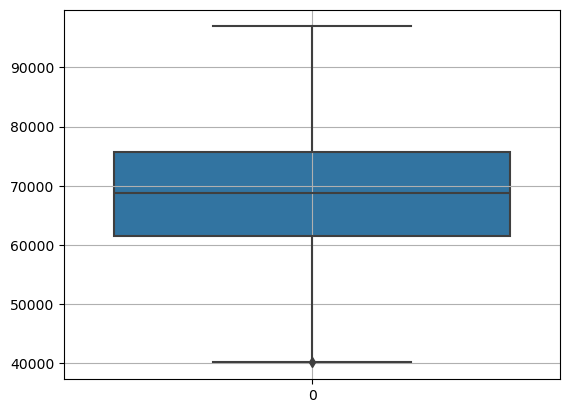

In [87]:
sn.boxplot(df['Avg. Area Income'])
plt.grid()

In [88]:
df[(df['Avg. Area Income'] < 40000) | (df['Avg. Area Income'] > 97000)]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


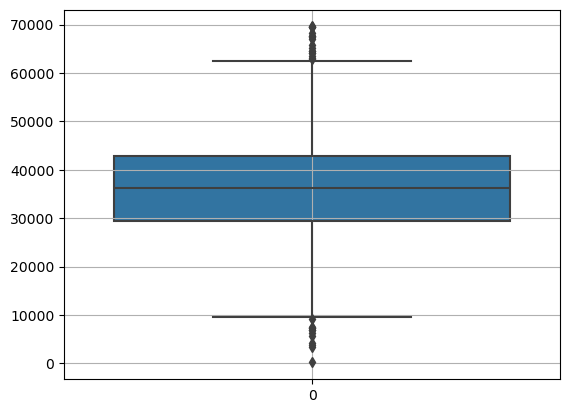

In [89]:
sn.boxplot(df['Area Population'])
plt.grid()

In [90]:
df[(df['Area Population']>63000 | (df['Area Population'] < 10000))]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [91]:
len(df[(df['Area Population'] > 63000 | (df['Area Population'] < 10000))])

4966

In [92]:
len(df[(df['Area Population'] < 10000) | (df['Area Population'] > 63000)])

32

## Feature Encoding
- categorical to numerical

In [94]:
#df['Address'].values

In [95]:
df['Address'].value_counts()

Address
208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
89265 Robert Haven Apt. 492\nSmithburgh, FM 58565-1105           1
PSC 7034, Box 6131\nAPO AA 05662-4293                            1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: count, Length: 4966, dtype: int64

In [96]:
# since all addresses are different we cannot group them and that means we'll have to create a lot of different columns
# that's why we drop this feature instead

In [97]:
df.shape

(4966, 7)

In [98]:
df.drop(columns=['Address'], axis=1, inplace = True)

In [99]:
df.shape

(4966, 6)

## Feature Selection
- using correlation matrix

In [101]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.006274,-0.012836,0.018610,-0.011947,0.629465
Avg. Area House Age,-0.006274,1.000000,-0.008912,0.005030,-0.018811,0.455607
Avg. Area Number of Rooms,-0.012836,-0.008912,1.000000,0.463133,0.004193,0.340249
Avg. Area Number of Bedrooms,0.018610,0.005030,0.463133,1.000000,-0.021517,0.171979
Area Population,-0.011947,-0.018811,0.004193,-0.021517,1.000000,0.414990
Price,0.629465,0.455607,0.340249,0.171979,0.414990,1.000000


<Axes: >

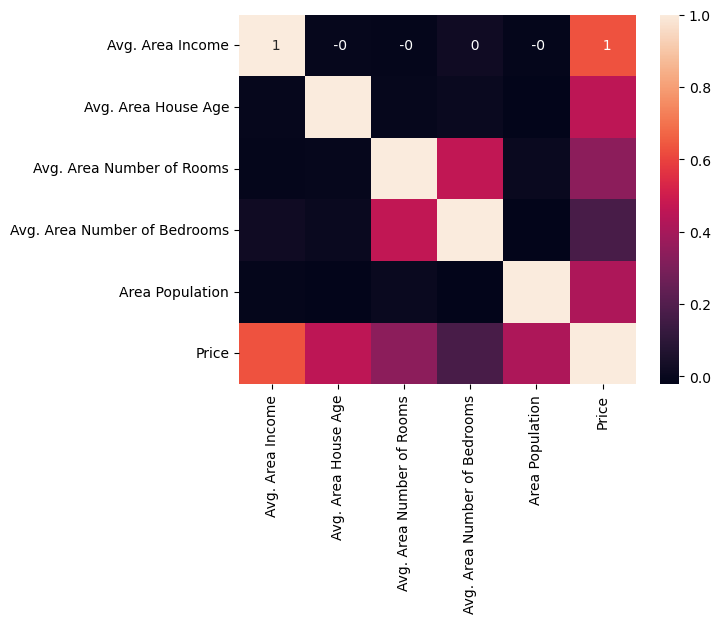

In [102]:
sn.heatmap(df.corr(), annot = True, fmt='3.0f')

In [103]:
df.corr()['Price']

Avg. Area Income                0.629465
Avg. Area House Age             0.455607
Avg. Area Number of Rooms       0.340249
Avg. Area Number of Bedrooms    0.171979
Area Population                 0.414990
Price                           1.000000
Name: Price, dtype: float64

# Model Building using Regression Algorithms

### Separate independent and dependent

In [106]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [107]:
#iloc[rows,columns]
x = df.iloc[:,:-1] # this selects every row and every column (except the last column)
x

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [108]:
y = df.loc[:, 'Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4966, dtype: float64

# 24thJune

### Train test split

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [112]:
df.shape

(4966, 6)

In [113]:
x_train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2502,55306.141974,6.125857,6.410318,4.06,32142.947348
2770,84802.787605,5.101614,7.844812,6.04,35748.331474
2521,61909.041438,6.228343,6.593138,4.29,28953.925377
82,82061.565204,4.182828,5.963032,4.10,36271.408496
809,66556.387650,6.321891,8.369451,4.21,45325.655862
...,...,...,...,...,...
4456,61660.272289,6.986938,6.262992,3.12,50291.359949
470,85719.315623,4.537668,6.029204,3.19,32058.356241
3113,74791.016755,6.113429,7.480409,6.45,29153.799650
3797,56348.353343,6.336787,4.891681,2.20,23476.973603


In [114]:
x_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
3160,65803.600647,6.730870,7.063988,4.06,36011.051169
1978,61687.869796,5.418325,7.334992,3.48,34760.760268
1354,43952.336214,5.416065,7.327671,4.41,25139.449944
3004,86084.335231,6.143843,6.776068,4.33,24447.106696
4944,64938.752493,5.089792,7.162307,6.13,34736.080244
...,...,...,...,...,...
425,51718.354612,7.509044,7.109312,3.11,49639.173237
97,75394.759582,6.933352,7.834100,4.48,22268.075306
4903,56161.346123,6.425913,7.065434,5.37,46485.051182
4940,83714.109245,6.314355,7.519223,4.41,28369.938123


# Model Selection

### Using Linear Regression

In [117]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [118]:
print(f'Training Accuracy: {lr.score(x_train,y_train)}')
print(f'Test Accuracy: {lr.score(x_test,y_test)}')

Training Accuracy: 0.9161466729297922
Test Accuracy: 0.9180015018430205


In [119]:
lr.score(x_train,y_train)

0.9161466729297922

In [120]:
lr.score(x_test,y_test)

0.9180015018430205

### Using Decision Trees

In [122]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [123]:
print(f'Training Accuracy: {dt.score(x_train,y_train)}')
print(f'Test Accuracy: {dt.score(x_test,y_test)}') #overfitting

Training Accuracy: 1.0
Test Accuracy: 0.7394001980864434


### Using Decision trees with hyper parameters

In [125]:
dt = DecisionTreeRegressor(max_depth=9)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=9)

In [126]:
print(f'Training Accuracy: {dt.score(x_train,y_train)}')
print(f'Test Accuracy: {dt.score(x_test,y_test)}') #overfitting

Training Accuracy: 0.9231149743558122
Test Accuracy: 0.7813573902975053


### Using Gradient Boosting algorithm

In [128]:
gb = GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)
gb.fit(x_train,y_train)

GradientBoostingRegressor(n_estimators=200)

In [129]:
gb.score(x_train,y_train)

0.9331579325146699

In [130]:
gb.score(x_test,y_test)

0.907787123361118

### Using XGBoost

In [132]:
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [133]:
xg.score(x_train,y_train)

0.9831542425286498

In [134]:
xg.score(x_test,y_test) #overfitting

0.8748331236150578

### Hyper parameters

In [136]:
xg = XGBRegressor(gamma=0.5, reg_alpha = 0.6, reg_lambda = 0.3)
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [137]:
xg.score(x_train,y_train)

0.9857335253514523

In [138]:
xg.score(x_test,y_test) #overfitting

0.8778487277856359

# Model Training

In [140]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [141]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [142]:
y_train

2502    6.479827e+05
2770    1.437984e+06
2521    1.063964e+06
82      1.102821e+06
809     1.780415e+06
            ...     
4456    1.347904e+06
470     1.187609e+06
3113    1.518706e+06
3797    6.492235e+05
867     7.638697e+05
Name: Price, Length: 3972, dtype: float64

In [143]:
y_pred_train

array([ 838521.68881132, 1537885.93430885,  972616.39243329, ...,
       1346190.98263532,  578377.19734612,  811248.84377672])

In [144]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [145]:
lr.coef_ #m1,m2,m3...

array([2.16406066e+01, 1.66104091e+05, 1.20673492e+05, 1.75557397e+03,
       1.51408551e+01])

In [146]:
pd.DataFrame(lr.coef_, columns = ['Coefficients'], index = x.columns)

,Coefficients
Avg. Area Income,21.640607
Avg. Area House Age,166104.090506
Avg. Area Number of Rooms,120673.492264
Avg. Area Number of Bedrooms,1755.573974
Area Population,15.140855


# Model Evaluation

In [148]:
# on training data

In [149]:
mean_squared_error(y_train,y_pred_train)

10268623193.674362

In [150]:
mean_absolute_error(y_train,y_pred_train)

81605.20894176603

In [151]:
r2_score(y_train,y_pred_train)

0.9161466729297922

In [152]:
# on test data

In [153]:
mean_absolute_error(y_test,y_pred_test)

79388.31116422483

In [154]:
r2_score(y_test,y_pred_test)

0.9180015018430205

In [155]:
# Let's create a function for the same

In [156]:
def Evaluation(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    print('Mean Absolute error:',mae)
    print('Mean Squared Error:',mse)
    print('Accuracy:',r2)

In [157]:
Evaluation(y_train,y_pred_train)
Evaluation(y_test,y_pred_test)

Mean Absolute error: 81605.20894176603
Mean Squared Error: 10268623193.674362
Accuracy: 0.9161466729297922
Mean Absolute error: 79388.31116422483
Mean Squared Error: 9769360588.245909
Accuracy: 0.9180015018430205


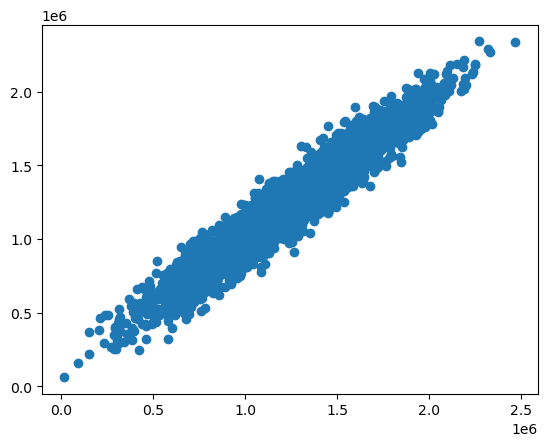

In [158]:
plt.scatter(y_train,y_pred_train)

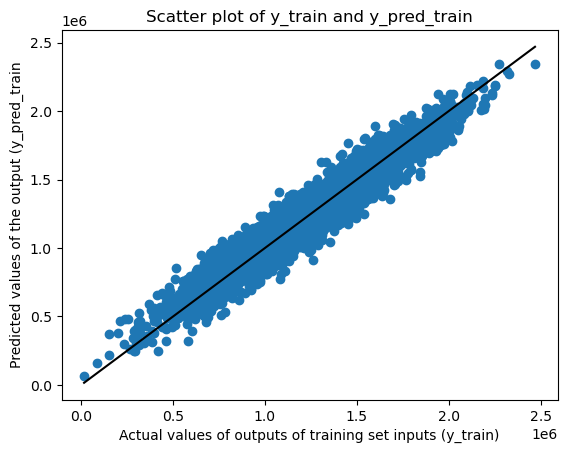

In [159]:
plt.scatter(y_train,y_pred_train)
plt.plot([y_train.min(), y_train.max()],[y_train.min(), y_train.max()],color='black') #best fit line

# adding title and labels
plt.title('Scatter plot of y_train and y_pred_train')
plt.xlabel('Actual values of outputs of training set inputs (y_train)')
plt.ylabel('Predicted values of the output (y_pred_train')

plt.show()

In [160]:
Evaluation(y_test,y_pred_test)

Mean Absolute error: 79388.31116422483
Mean Squared Error: 9769360588.245909
Accuracy: 0.9180015018430205


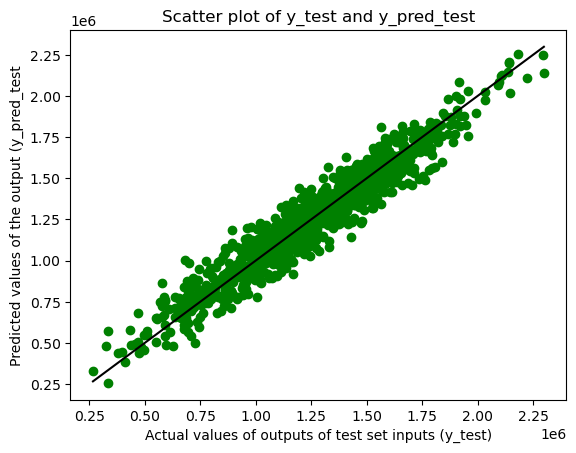

In [161]:
plt.scatter(y_test, y_pred_test, color = 'g')
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()],color='black') #best fit line

# adding title and labels
plt.title('Scatter plot of y_test and y_pred_test')
plt.xlabel('Actual values of outputs of test set inputs (y_test)')
plt.ylabel('Predicted values of the output (y_pred_test')

plt.show()

In [162]:
#---------------Project complete-------------------------------------------